In [1]:
import imageio as io
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from skimage.transform import rotate

In [2]:
min_cells,max_cells=70,310

In [13]:
pad=10
xx,yy=np.meshgrid(np.arange(256+2*pad),np.arange(256+2*pad))
#border pad
fringe=np.pad(np.zeros((256,256)),((pad,pad),(pad,pad)),mode='constant',constant_values=1)
fringe=fringe.astype(bool)


def make_localization_synthetic_vgg():
    n_cell=np.random.randint(min_cells,max_cells)
    x,y=np.random.randint(0,255,size=(2,n_cell))+pad
    image=np.zeros((256+2*pad,256+2*pad,3))
    #homing_gaussian=np.zeros((256+2*pad,256+2*pad))
    #square_for_area=np.zeros((256+2*pad,256+2*pad))
    noise=np.clip(np.random.normal(loc=0.02,scale=0.03,size=(256+2*pad,256+2*pad)),0,1)
    image[:,:,0]=np.clip(np.random.normal(loc=0.02,scale=0.03,size=(256+2*pad,256+2*pad)),0,1)
    
    for i in range(n_cell):
        mask=(xx-x[i])**2+(yy-y[i])**2<(6)**2
        image[mask,0]=0.3*np.random.rand()+0.6+noise[mask]
        image[:,:,1]+=0.4*np.exp(-((yy-y[i])/3.)**2-((xx-x[i])/3.)**2)
        image[:,:,2]+=0.5*np.exp(-((yy-y[i])/1.)**2-((xx-x[i])/1.)**2)
    return image

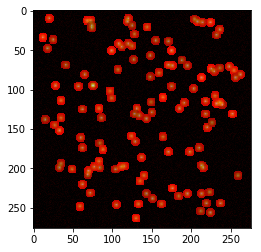

In [14]:
plt.imshow(make_localization_synthetic_vgg())

In [17]:
N_images=50
dataname='VGG_localization'
train_name='trainA'
directory='../Data/'+dataname+'/'+train_name+'/'
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
for i in range(N_images):
    name=directory+str(i).zfill(5)+'.png'
    image=make_localization_synthetic_vgg()
    io.imsave(name,image)
    if i%50==0:
        print i,

/usr/local/lib/python2.7/dist-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [0.0, 1.02268088151]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


0

/usr/local/lib/python2.7/dist-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [0.0, 1.01464227872]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/usr/local/lib/python2.7/dist-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [0.0, 1.02984934249]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/usr/local/lib/python2.7/dist-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [0.0, 1.01064395335]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/usr/local/lib/python2.7/dist-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [0.0, 1.01649309037]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/usr/local/lib/python2.7/dist-packages/imageio/core/util.py:104: UserWarning: Conversion from float64 to uint8, range [0.0, 1.02021895102]
  'range [{2}, {3}]'.format(dtype_str